# Q4

1-

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
class MexicanHat():
    def __init__(self, inputArray, r1, r2, c1, c2, t_max):
        self.array = inputArray
        self.oldArray = [0.00] * len(inputArray)
        self.r1 = r1
        self.r2 = r2
        self.c1 = c1
        self.c2 = c2
        self.t_max = t_max
    
    def backup(self):
        for i in range(len(self.oldArray)):
            self.oldArray[i] = self.array[i]

    def calculateEffectiveValue(self, targetInd, curInd):
        if curInd < targetInd - self.r1 or curInd > targetInd + self.r1:
            return self.c2 * self.oldArray[curInd]
        return self.c1 * self.oldArray[curInd]

    def activate(self, value):
        if value < 0:
            return 0
        elif value < 2:
            return value
        return 2

    def calculateNewElement(self, index):
        result = 0.00
        startInd = max(0, index - self.r2)
        endInd = min(len(self.oldArray), index + self.r2 + 1)

        for curInd in range(startInd, endInd):
            result += self.calculateEffectiveValue(index, curInd)
        return self.activate(result)

    def update(self):
        self.backup()
        for i in range(len(self.array)):
            self.array[i] = self.calculateNewElement(i)
    
    def plotResult(self, iterationInd):
        plt.plot(range(1, len(self.array) + 1), self.array)
        plt.xlabel('Iteration ' + str(iterationInd))
        plt.show()

    def train(self):
        self.plotResult(0)
        for i in range(self.t_max):
            self.update()
            self.plotResult(i + 1)


A)

In [ ]:
firstMexicanHat = MexicanHat([0.24, 0.3, 0.45, 0.57, 0.8, 0.69, 0.42, 0.26, 0.14], r1=1, r2=4, c1=0.6, c2=-0.4, t_max=5)

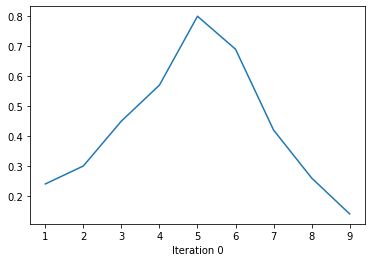

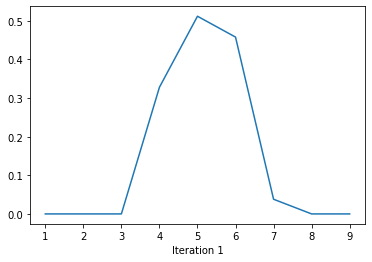

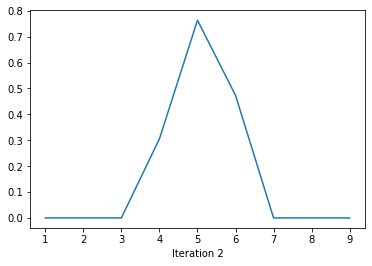

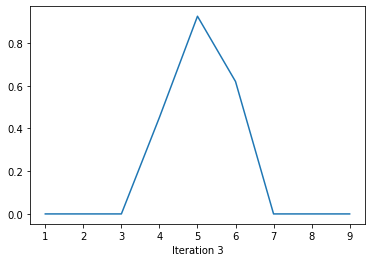

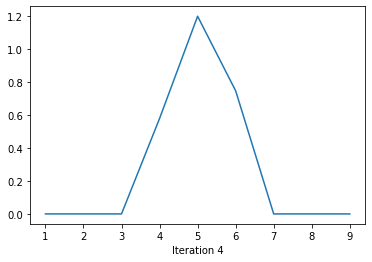

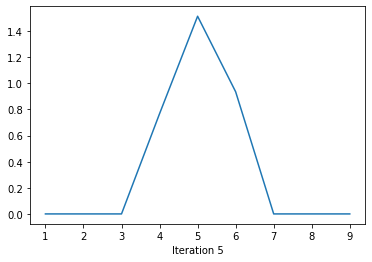

In [ ]:
firstMexicanHat.train()

B)

In [ ]:
maxnet = MexicanHat([0.24, 0.3, 0.45, 0.57, 0.8, 0.69, 0.42, 0.26, 0.14], r1=0, r2=8, c1=1, c2=-0.1, t_max=10)

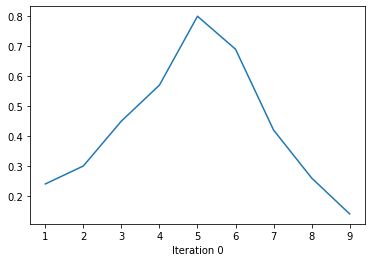

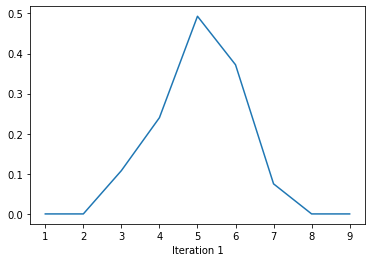

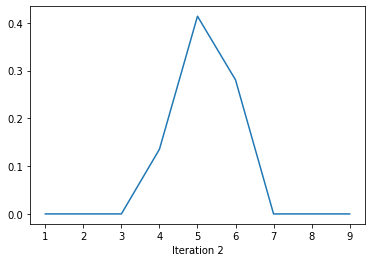

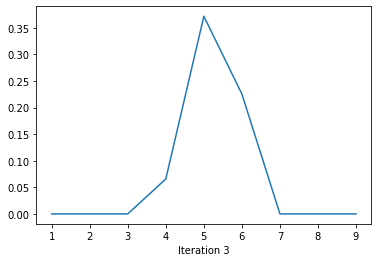

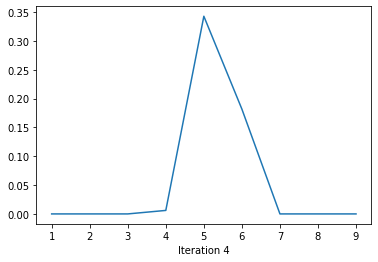

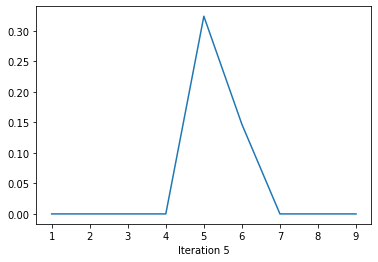

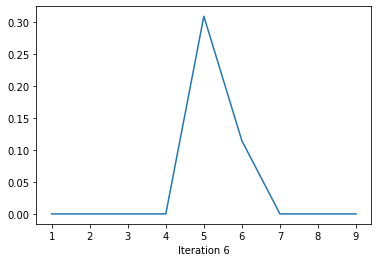

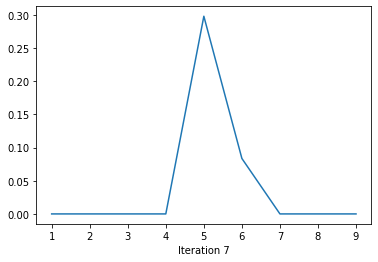

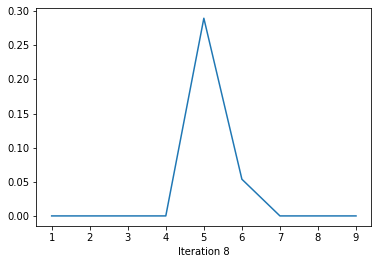

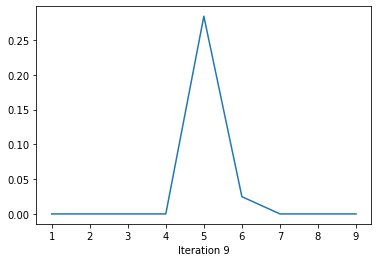

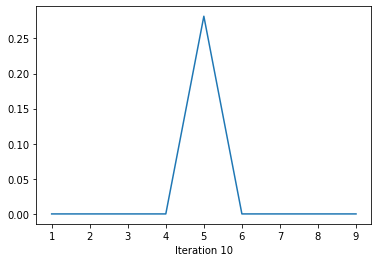

In [ ]:
maxnet.train()

2-

In [ ]:
class HammingNet():
    def __init__(self, e_vectors):
        self.e_vectors = e_vectors
        self.m = len(e_vectors)
        self.n = len(e_vectors[0])
        self.w = self.setWeights()
    
    def setWeights(self):
        result = [[0 for _ in range(self.n + 1)] for _ in range(self.m)]
        for i in range(self.m):
            for j in range(self.n + 1):
                if j == 0:
                    result[i][j] = self.n / 2
                else:
                    result[i][j] = self.e_vectors[i][j - 1] / 2
        return result
    
    def calculateClass(self, inputVec):
        scores = [0] * self.m
        for i in range(self.m):
            tmp = 0
            for j in range(len(inputVec)):
                tmp += self.w[i][j] * inputVec[j]
            scores[i] = tmp
        max_value = max(scores)
        max_index = scores.index(max_value)
        return (self.e_vectors[max_index], max_value)

    def classify(self, inputVec):
        inputVec_withBias = [1] + inputVec
        result = self.calculateClass(inputVec_withBias)
        return result

In [ ]:
eVecs = [[ 1, -1,  1, -1, -1, -1],
          [-1,  1, -1,  1,  1, -1],
          [-1, -1,  1,  1, -1,  1],
          [ 1,  1, -1,  1,  1, -1]]
hammingNet = HammingNet(eVecs)

In [ ]:
inputVecs = [[-1, -1,  1, -1,  1, -1],
             [ 1,  1,  1,  1, -1, -1],
             [-1, -1, -1,  1,  1, -1],
             [ 1, -1,  1,  1, -1,  1],
             [ 1,  1,  1, -1, -1, -1],
             [ 1, -1, -1,  1,  1,  1],
             [-1,  1, -1, -1, -1,  1]]

In [ ]:
result = []
for v in inputVecs:
    result.append(hammingNet.classify(v))

In [ ]:
for i in range(len(result)):
    print(inputVecs[i], '---------maps to--------->',result[i][0], '       score:', result[i][1])
    print()

[-1, -1, 1, -1, 1, -1] ---------maps to---------> [1, -1, 1, -1, -1, -1]        score: 4.0

[1, 1, 1, 1, -1, -1] ---------maps to---------> [1, -1, 1, -1, -1, -1]        score: 4.0

[-1, -1, -1, 1, 1, -1] ---------maps to---------> [-1, 1, -1, 1, 1, -1]        score: 5.0

[1, -1, 1, 1, -1, 1] ---------maps to---------> [-1, -1, 1, 1, -1, 1]        score: 5.0

[1, 1, 1, -1, -1, -1] ---------maps to---------> [1, -1, 1, -1, -1, -1]        score: 5.0

[1, -1, -1, 1, 1, 1] ---------maps to---------> [1, 1, -1, 1, 1, -1]        score: 4.0

[-1, 1, -1, -1, -1, 1] ---------maps to---------> [-1, 1, -1, 1, 1, -1]        score: 3.0

